In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv("/content/parkinsons.csv")

In [ ]:
data.head(10)

,name,MDVP:Fo(Hz),MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,0.04701,0.456,0.02328,0.03526,0.03243,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,0.01608,0.140,0.00779,0.00937,0.01351,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,0.01567,0.134,0.00829,0.00946,0.01256,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,0.02093,0.191,0.01073,0.01277,0.01717,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,0.02838,0.255,0.01441,0.01725,0.02444,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [ ]:
# number of rows and columns in the dataset
data.shape

(195, 17)

In [ ]:
# getting some info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Shimmer      195 non-null    float64
 3   MDVP:Shimmer(dB)  195 non-null    float64
 4   Shimmer:APQ3      195 non-null    float64
 5   Shimmer:APQ5      195 non-null    float64
 6   MDVP:APQ          195 non-null    float64
 7   Shimmer:DDA       195 non-null    float64
 8   NHR               195 non-null    float64
 9   HNR               195 non-null    float64
 10  status            195 non-null    int64  
 11  RPDE              195 non-null    float64
 12  DFA               195 non-null    float64
 13  spread1           195 non-null    float64
 14  spread2           195 non-null    float64
 15  D2                195 non-null    float64
 16  PPE               195 non-null    float64
dt

In [ ]:
# checking for missing values in each column
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
# statistical measures about the data
data.describe()

,MDVP:Fo(Hz),MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
# distribution of target Variable
data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [ ]:
# grouping the data bas3ed on the target variable
data.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,
0,181.937771,0.017615,0.162958,0.009504,0.010509,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,0.033658,0.321204,0.017676,0.020285,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


In [ ]:
# Separating the features & Target
X = data.drop(columns=['name','status'], axis=1)
Y = data['status']

In [ ]:
X.head()

,MDVP:Fo(Hz),MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

In [ ]:
# Splitting the data to training data & Test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(195, 15) (156, 15) (39, 15)


In [ ]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)

[[ 0.63239631 -0.3137565  -0.32592164 ... -0.97586547 -0.55160318
   0.07769494]
 [-1.05512719  0.44321834  0.51889992 ...  0.3981808  -0.61014073
   0.39291782]
 [ 0.02996187  0.29594502  0.0409723  ... -0.43937044 -0.62849605
  -0.50948408]
 ...
 [-0.9096785  -0.71436005 -0.70729823 ...  1.22001022 -0.47404629
  -0.2159482 ]
 [-0.35977689 -0.81639583 -0.83281457 ... -0.17896029 -0.47272835
   0.28181221]
 [ 1.01957066 -0.47761692 -0.52867881 ... -0.716232    1.23632066
  -0.05829386]]


In [ ]:
# Multiple Models Training & Evaluation
models = {
    "Logistic Regression": LogisticRegression(),
    "K Nearest Neighbor": KNeighborsClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "Decision Tree" : DecisionTreeClassifier(),
    "SVM": SVC(),
    "XGBooster":XGBClassifier()
}

# Initialize an empty list to store F1 scores
f1_scores = []
model_names=[]

# Iterate through each model
for name, model in models.items():
    # Training the classifier
    model.fit(X_train, Y_train)

    # Predictions on training data
    train_predictions = model.predict(X_train)
    train_accuracy = accuracy_score(train_predictions, Y_train)

    # Predictions on test data
    test_predictions = model.predict(X_test)
    test_accuracy = accuracy_score(test_predictions, Y_test)

    # Calculate F1 score and append to the list
    f1 = f1_score(Y_test, test_predictions)
    f1_scores.append(f1)
    model_names.append(name)

    # Print results
    print(f"Model: {name}")
    print(f"Training Accuracy: {train_accuracy:.2f}")
    print(f"Test Accuracy: {test_accuracy:.2f}")
    print(f"F1 Score: {f1:.2f}")
    overall_accuracy = ((train_accuracy + test_accuracy) / 2)*100
    print('Overall accuracy: ', overall_accuracy)
    print()


Model: Logistic Regression
Training Accuracy: 0.87
Test Accuracy: 0.77
F1 Score: 0.85
Overall accuracy:  82.05128205128204

Model: K Nearest Neighbor
Training Accuracy: 0.98
Test Accuracy: 0.87
F1 Score: 0.92
Overall accuracy:  92.62820512820514

Model: Random Forest
Training Accuracy: 1.00
Test Accuracy: 0.82
F1 Score: 0.89
Overall accuracy:  91.02564102564102

Model: Decision Tree
Training Accuracy: 1.00
Test Accuracy: 0.74
F1 Score: 0.81
Overall accuracy:  87.17948717948718

Model: SVM
Training Accuracy: 0.92
Test Accuracy: 0.87
F1 Score: 0.92
Overall accuracy:  89.74358974358975

Model: XGBooster
Training Accuracy: 1.00
Test Accuracy: 0.87
F1 Score: 0.92
Overall accuracy:  93.58974358974359



**XG Booster**

In [ ]:
# Model Training & Evaluation
classifier = XGBClassifier()

#training the XG Booster  Classifier
classifier.fit(X_train, Y_train)

# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

overall_accuracy = ((training_data_accuracy + test_data_accuracy) / 2) * 100
print('Overall accuracy: ', overall_accuracy)

# Confusion Matrix
conf_matrix_test = confusion_matrix(Y_test, X_test_prediction)
print('Confusion Matrix:', conf_matrix_test)

Accuracy score of the training data :  1.0
Accuracy score of the test data :  0.8717948717948718
Overall accuracy:  93.58974358974359
Confusion Matrix: [[ 6  2]
 [ 3 28]]


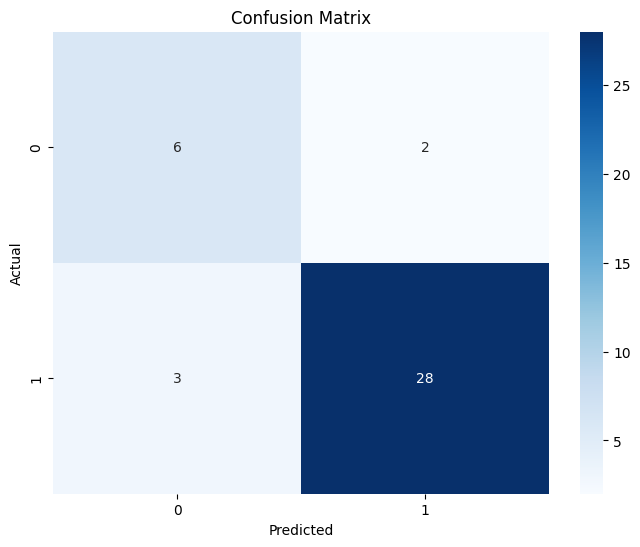

In [ ]:
# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Predictive System**

In [ ]:
input_data = (197.07600,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)

prediction = model.predict(std_data)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")


[0]
The Person does not have Parkinsons Disease


**Saving the trained model**

In [ ]:
import pickle

In [ ]:
filename = 'parkinsons.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
# loading the saved model
parkisons_model = pickle.load(open('parkinsons.sav', 'rb'))

In [ ]:
input_data = (197.07600,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)

prediction = model.predict(std_data)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")


[0]
The Person does not have Parkinsons Disease


In [ ]:
data

,name,MDVP:Fo(Hz),MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


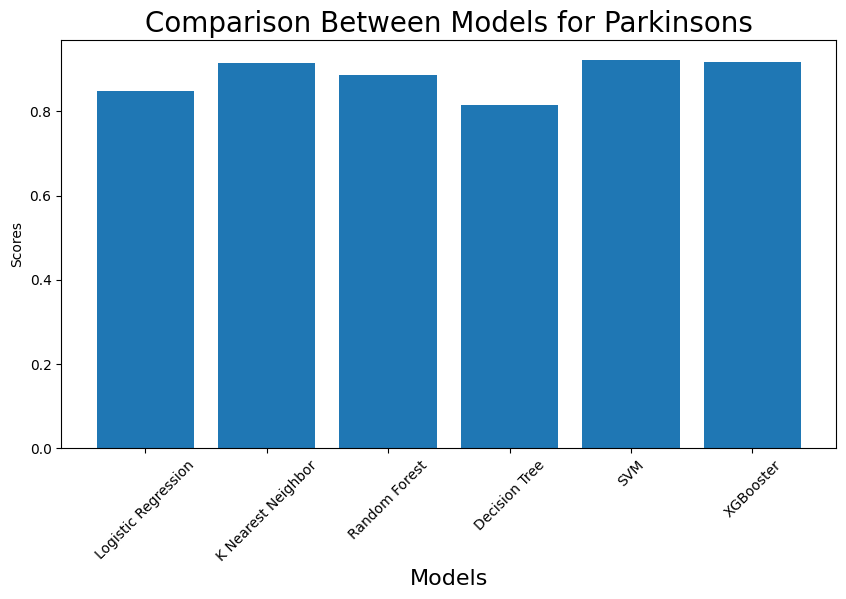

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bar chart
ax.bar(model_names, f1_scores)

# Set the title and axis labels
ax.set_title('Comparison Between Models for Parkinsons', fontsize=20)
ax.set_xlabel('Models', fontsize=16)
ax.set_ylabel('Scores', fontsize=10)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Adjust the spacing between subplots
plt.subplots_adjust(bottom=0.2)

# Display the plot
plt.show()